# Example 2.7
A sieve analysis and a hydrometer analysis was conducted on a soil producing the results shown in the tables below. Calculate the clay fraction and plot the combined GSD

## Data

Tables from problem

## Principles

$F_F=C_F+M_F$ ($M_F=$ silt fraction)

In [1]:
import numpy as np
import pandas as pd
import Soilved as slv
import matplotlib.pyplot as plt

In [2]:
GSD_sieve=pd.read_csv('./data/mod2example7_sieve.csv')
GSD_sieve

,d,Ws (gr)
0,4.750,0.00
1,2.000,12.12
2,0.850,25.36
3,0.425,32.15
4,0.250,33.14
5,0.150,33.78
6,0.106,47.56
7,0.075,50.14
8,1.000,100.25
9,2.000,334.50


In [3]:
GSD_hydro=pd.read_csv('./data/mod2example7_hydro.csv')
GSD_hydro

,d,Passing
0,0.0660,85
1,0.0450,74
2,0.0360,68
3,0.0250,58
4,0.0150,48
5,0.0110,42
6,0.0070,35
7,0.0050,28
8,0.0040,24
9,0.0030,20


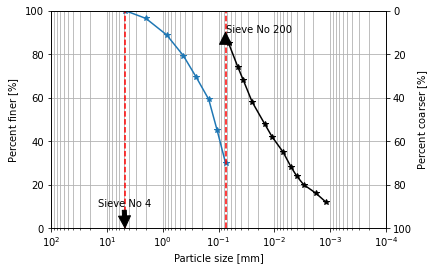

In [4]:
#process the sieve analysis
slv.Process_GSD(GSD_sieve) #processes the GSD
plt.plot(GSD_hydro['d'], 100-GSD_hydro['Passing'], '*-', color='k')

In [5]:
GSD_hydro['Passing']=GSD_hydro['Passing']*GSD_sieve['Passing'][7]/100 #correction was applied

In [6]:
GSD_full=GSD_sieve.append(GSD_hydro) #append data
GSD_full=GSD_full[GSD_full['d']!= 1] #removes pan
GSD_full=GSD_full[GSD_full['d']!= 2] #removes total
GSD_full=GSD_full.reset_index(drop=True)
GSD_full

,d,Ws (gr),Weight retained,Retained,Passing
0,4.7500,0.00,0.00,0.000000,100.000000
1,0.8500,25.36,37.48,11.204783,88.795217
2,0.4250,32.15,69.63,20.816143,79.183857
3,0.2500,33.14,102.77,30.723468,69.276532
4,0.1500,33.78,136.55,40.822123,59.177877
5,0.1060,47.56,184.11,55.040359,44.959641
6,0.0750,50.14,234.25,70.029895,29.970105
7,0.0660,NaN,NaN,NaN,25.474589
8,0.0450,NaN,NaN,NaN,22.177877
9,0.0360,NaN,NaN,NaN,20.379671


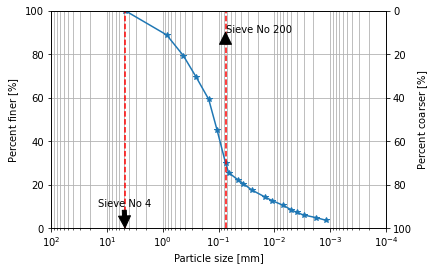

In [7]:
slv.PlotGSD(GSD_full)

In [8]:
# For the clay fraction we need to find the percent finer or passing 2 um
C_F=slv.GetClayFraction(GSD_full['d'], GSD_full['Passing']) #gets clay fraction by interpolation
print("C_F= %1.2f percent" %C_F)

C_F= 5.04 percent


# Example 2.8

Determine the gradation coefficients and the median grain size of the soil used in Example 2.7

## Data:

Problem data

## Principles

$\log(D_x/d_i)=\cfrac{\log(d_i/d_{i+1})}{P_{P,i}-P{P,i+1}}(x-P{P,i})$

$C_u=D_{60}/D_{10}$

$C_c=\cfrac{D_{30}^2}{D_{60}D_{10}}$

In [13]:
#Find the median grain size
D_50=slv.log_interp(50,GSD_full['d'], GSD_full['Passing']) #use function from soilved
print("D_50= %.2E mm" %D_50)

D_50= 1.20E-01 mm


In [15]:
#Find D10
D_10=slv.log_interp(10,GSD_full['d'], GSD_full['Passing']) #use function from soilved
print("D_10= %.2E mm" %D_10)

D_10= 6.47E-03 mm


In [16]:
#Find D30
D_30=slv.log_interp(30,GSD_full['d'], GSD_full['Passing']) #use function from soilved
print("D_30= %.2E mm" %D_30)

D_30= 7.51E-02 mm


In [17]:
#Find D60
D_60=slv.log_interp(60,GSD_full['d'], GSD_full['Passing']) #use function from soilved
print("D_60= %.2E mm" %D_60)

D_60= 1.56E-01 mm


In [19]:
C_u=D_60/D_10 #coefficient of uniformity
print("Cu= %1.2f" %C_u)

Cu= 24.16


In [20]:
C_c=D_30**2/(D_10*D_60)#coefficient of uniformity
print("Cc= %1.2f" %C_c)

Cc= 5.57
